# ***Data Visualization*** 

##Submission 2

###***By Het Naik, CE18***

In this part, as this topics requires large data for better visulaizations and observation, I have taken the datasets from the sources available on Internet, such as the famous MNIST dataset, fashion MNIST dataset, iris dataset and the Population dataset.


In [ ]:
import numpy as np
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from scipy.stats import norm
import time
import keras
from keras.layers import Conv2D, Conv2DTranspose, Input, Flatten, Dense, Lambda, Reshape
from keras.layers import BatchNormalization
from keras.models import Model
from keras.datasets import mnist
from keras.losses import binary_crossentropy
from keras import backend as K



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


## T SNE

Description:

I have taken an example of detection of numbers (MNIST datset) in which 1567 different values are available

Same digits are mostly in the same cluster after performing TSNE for dimensionality reduction

Also, 3 and 9 are almost in same shape, so we see some intersections in the graph. Also, 0 is different from most of the numbers, so we see almost no intersections in the graph 

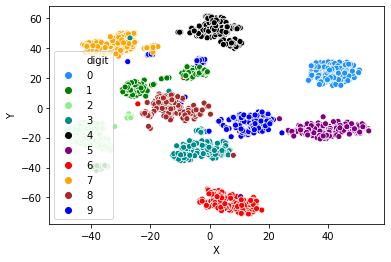

In [ ]:
dig = load_digits()
#taking 1500 values out of 1567 
data_X = dig.data[:1500]
data_y = dig.target[:1500]
tsne = TSNE(n_components=2, random_state=0)
tsne_obj= tsne.fit_transform(data_X)
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        'digit':data_y})
sns.scatterplot(x="X", y="Y",
              hue="digit",
              palette=['dodgerblue','green','lightgreen','darkcyan', 'black','purple','red','orange','brown','blue'],  
              legend='brief',
              data=tsne_df);

## HeatMaps
Desciption:

I already had briefed about it in the previous submission related to correaltion matrix, and here I have used similar dataset but this time compared the country/ continent's gdp per captia income in different years.

1. In the first graph, we see the increase in GDPperCap for different years in 5 continents.
2. In the second graph, we see the increase in GDPperCap for different years in all the countries.
3. In the third graph, we see the increase in GDPperCap for different years in continent-country pair. 

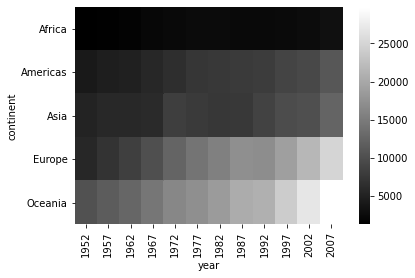

In [ ]:
gapminder = pd.read_csv('http://bit.ly/2cLzoxH')
df1 = gapminder[['continent', 'year','gdpPercap']]
heatmap1_data = pd.pivot_table(df1, values='gdpPercap', index=['continent'], columns='year')
sns.heatmap(heatmap1_data, cmap="gray")

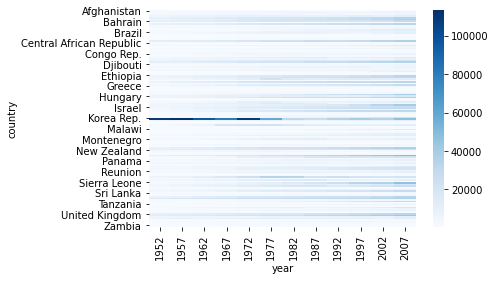

In [ ]:
df2 = gapminder[['country','continent', 'year','gdpPercap']]
heatmap2_data = pd.pivot_table(df2, values='gdpPercap', index=['country'], columns='year')
sns.heatmap(heatmap2_data, cmap="Blues")

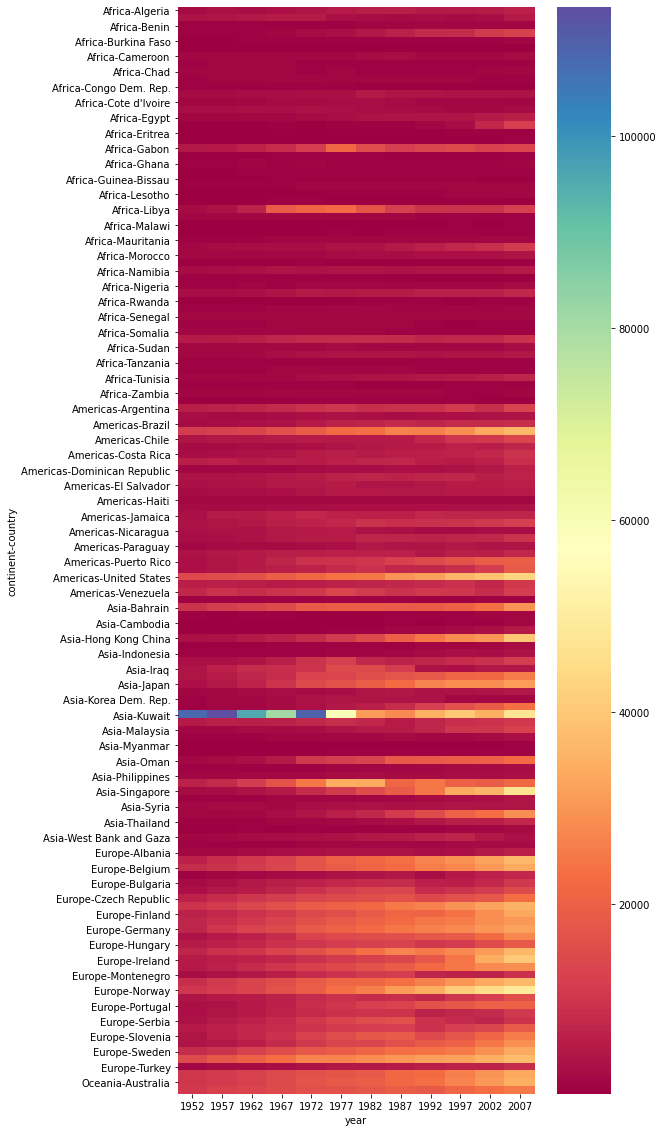

In [ ]:
df3 = gapminder[['country','continent', 'year','gdpPercap']]
# pandas pivot with multiple variables
heatmap3_data = pd.pivot_table(df3,values='gdpPercap', index=['continent','country'], columns='year')
plt.figure(figsize=(8, 20))
sns.heatmap(heatmap3_data, cmap="Spectral")

## Variational AutoEncoders
Description:

I have used the Fashion MNIST dataset and trained it using VAE. And, for timebeing, I have taken only 5 epochs as tpe is approximaely 50 seconds! 

As we can see, around (0,0) our latent space starts to be continuous as well as incomplete on going to the bottom right. Somewhere around (1,-2) we see many holes or a complete empty space. We can see these issues in the actual sampling too which is also shown below the transformed graph. This is because of the different size and shape of the clothes such as socks (small space) and shirts (Large space). 

P.S. - Frankly, I have not understood the entire working of the code, but still tried and succeeded to understand a major part of it 

4423680/4422102 [==============================] - 1s 0us/step
Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 14, 14, 8)    80          encoder_input[0][0]              
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 14, 14, 8)    32          conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 7, 7, 16)     1168        batch_normalization_1[0][0]      
_____________________________

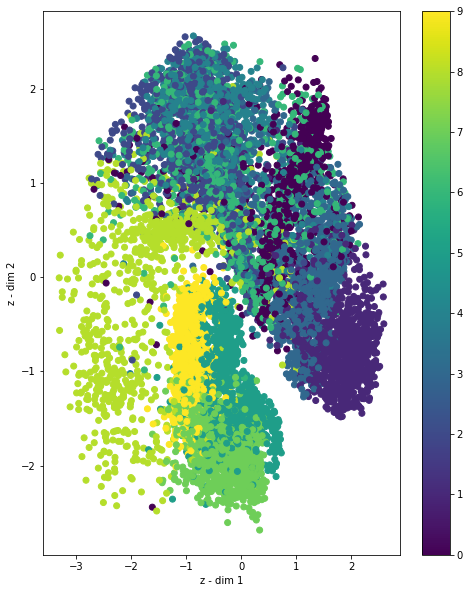

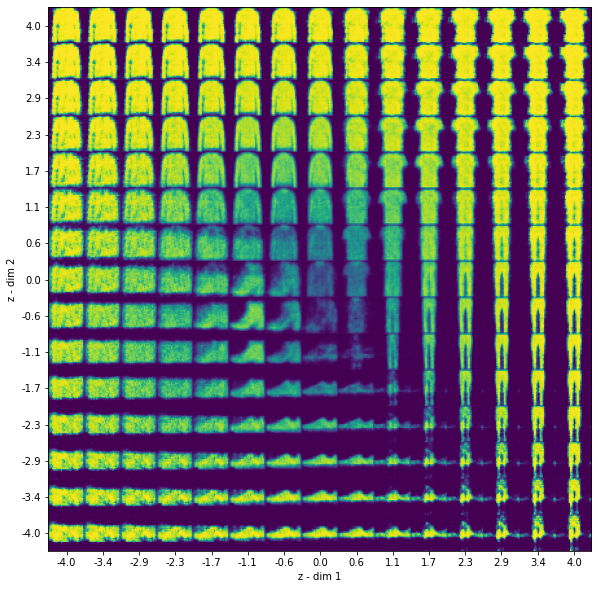

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
# Load MNIST dataset
(input_train, target_train), (input_test, target_test) = fashion_mnist.load_data()

# Data & model configuration
img_width, img_height = input_train.shape[1], input_train.shape[2]
batch_size = 128
no_epochs = 5
validation_split = 0.2
verbosity = 1
latent_dim = 2
num_channels = 1

# Reshape data
input_train = input_train.reshape(input_train.shape[0], img_height, img_width, num_channels)
input_test = input_test.reshape(input_test.shape[0], img_height, img_width, num_channels)
input_shape = (img_height, img_width, num_channels)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Encoder

# Definition
i       = Input(shape=input_shape, name='encoder_input')
cx      = Conv2D(filters=8, kernel_size=3, strides=2, padding='same', activation='relu')(i)
cx      = BatchNormalization()(cx)
cx      = Conv2D(filters=16, kernel_size=3, strides=2, padding='same', activation='relu')(cx)
cx      = BatchNormalization()(cx)
x       = Flatten()(cx)
x       = Dense(20, activation='relu')(x)
x       = BatchNormalization()(x)
mu      = Dense(latent_dim, name='latent_mu')(x)
sigma   = Dense(latent_dim, name='latent_sigma')(x)

# Get Conv2D shape for Conv2DTranspose operation in decoder
conv_shape = K.int_shape(cx)

# Define sampling with reparameterization trick
def sample_z(args):
  mu, sigma = args
  batch     = K.shape(mu)[0]
  dim       = K.int_shape(mu)[1]
  eps       = K.random_normal(shape=(batch, dim))
  return mu + K.exp(sigma / 2) * eps

# Use reparameterization trick to ....??
z       = Lambda(sample_z, output_shape=(latent_dim, ), name='z')([mu, sigma])

# Instantiate encoder
encoder = Model(i, [mu, sigma, z], name='encoder')
encoder.summary()

# Decoder

# Definition
d_i   = Input(shape=(latent_dim, ), name='decoder_input')
x     = Dense(conv_shape[1] * conv_shape[2] * conv_shape[3], activation='relu')(d_i)
x     = BatchNormalization()(x)
x     = Reshape((conv_shape[1], conv_shape[2], conv_shape[3]))(x)
cx    = Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding='same', activation='relu')(x)
cx    = BatchNormalization()(cx)
cx    = Conv2DTranspose(filters=8, kernel_size=3, strides=2, padding='same',  activation='relu')(cx)
cx    = BatchNormalization()(cx)
o     = Conv2DTranspose(filters=num_channels, kernel_size=3, activation='sigmoid', padding='same', name='decoder_output')(cx)

# Instantiate decoder
decoder = Model(d_i, o, name='decoder')
decoder.summary()

# VAE as a whole

# Instantiate VAE
vae_outputs = decoder(encoder(i)[2])
vae         = Model(i, vae_outputs, name='vae')
vae.summary()

# Define loss
def kl_reconstruction_loss(true, pred):
  # Reconstruction loss
  reconstruction_loss = binary_crossentropy(K.flatten(true), K.flatten(pred)) * img_width * img_height
  # KL divergence loss
  kl_loss = 1 + sigma - K.square(mu) - K.exp(sigma)
  kl_loss = K.sum(kl_loss, axis=-1)
  kl_loss *= -0.5
  # Total loss = 50% rec + 50% KL divergence loss
  return K.mean(reconstruction_loss + kl_loss)

# Compile VAE
vae.compile(optimizer='adam', loss=kl_reconstruction_loss)

# Train autoencoder
vae.fit(input_train, input_train, epochs = no_epochs, batch_size = batch_size, validation_split = validation_split)

def viz_latent_space(encoder, data):
  input_data, target_data = data
  mu, _, _ = encoder.predict(input_data)
  plt.figure(figsize=(8, 10))
  plt.scatter(mu[:, 0], mu[:, 1], c=target_data)
  plt.xlabel('z - dim 1')
  plt.ylabel('z - dim 2')
  plt.colorbar()
  plt.show()

def viz_decoded(encoder, decoder, data):
  num_samples = 15
  figure = np.zeros((img_width * num_samples, img_height * num_samples, num_channels))
  grid_x = np.linspace(-4, 4, num_samples)
  grid_y = np.linspace(-4, 4, num_samples)[::-1]
  for i, yi in enumerate(grid_y):
      for j, xi in enumerate(grid_x):
          z_sample = np.array([[xi, yi]])
          x_decoded = decoder.predict(z_sample)
          digit = x_decoded[0].reshape(img_width, img_height, num_channels)
          figure[i * img_width: (i + 1) * img_width,
                  j * img_height: (j + 1) * img_height] = digit
  plt.figure(figsize=(10, 10))
  start_range = img_width // 2
  end_range = num_samples * img_width + start_range + 1
  pixel_range = np.arange(start_range, end_range, img_width)
  sample_range_x = np.round(grid_x, 1)
  sample_range_y = np.round(grid_y, 1)
  plt.xticks(pixel_range, sample_range_x)
  plt.yticks(pixel_range, sample_range_y)
  plt.xlabel('z - dim 1')
  plt.ylabel('z - dim 2')
  # matplotlib.pyplot.imshow() needs a 2D array, or a 3D array with the third dimension being of shape 3 or 4!
  # So reshape if necessary
  fig_shape = np.shape(figure)
  if fig_shape[2] == 1:
    figure = figure.reshape((fig_shape[0], fig_shape[1]))
  # Show image
  plt.imshow(figure)
  plt.show()

# Plot results
data = (input_test, target_test)
viz_latent_space(encoder, data)
viz_decoded(encoder, decoder, data)

## PCA
Description:

I have taken the use of iris dataset and have scaled the data before PCA
and we see the new variance, based on the color codes from iris dataset. 

The PCA space maximizes the variance of the original data. To visualize the projected data as well as the contribution of the original variables, in a joint plot, I have used biplot

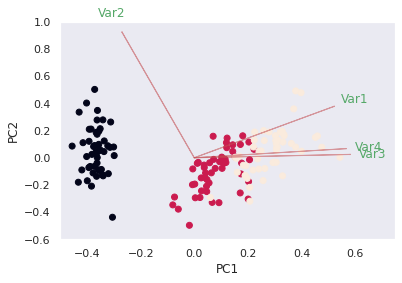

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    
pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-0.5,0.75)
    plt.ylim(-0.6,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()